# Случайные процессы. Практическое задание 4

* Дедлайн **31 октября 23:59** (9 дней на выполнение).
* Внимательно прочтите правила оформления. Задания, оформленные не по правилам, могут быть проигнорированы.
* Задание творческое, и некоторые параметры неопределены численно. Их нужно выбирать самостоятельно.
* В коде могут встречаться пропуски, которые обычно обозначаются так: <пояснение>

Это был обычный день в начале нового учебного года. Студент третьего курса ФИВТ Семен поужинал и лег спать. И вдруг во сне ему приснилось, что в курсе случайных процессов с этого года введена практика. А задания такие объемные, что даже условие одного задания занимает 3 страницы. Да и на его выполнение уходит не меньше недели по 5 часов в день. А еще они такие... непонятные, что приходится переспрашивать каждое предложение. 

Тут Семен понял, что так больше нельзя. И, сказав "Хватит это терпеть!", решил основать фонд страхования студентов. Страховыми случаями являются апатия, депрессия, отсутствие сна из-за бесконечной учебы и, наконец, очередное задание по случайным процессам с условием на три страницы. В качестве компенсации предлагалось выдавать несколько часов сна, просмотр кино, романтическую прогулку вдвоем, поход в лес, зажигательную ночь на дискотеке и, наконец, автоматический решатель очередного задания.

В качестве модели страхования Семен остановился на модели страхования Крамера-Лундберга. Однако, когда он начал в ней разбираться, он увидел слова "процесс восстановления" и расстроился. Семен понял, что случайные процессы в жизни везде и, сказав "Хватит это терпеть!", тут же проснулся и отправился готовиться к следующему занятию по случайным процессам. Как оказалось, практику по случайным процессам действительно ввели. Семен старался и занимался лучше всех. Правда, на экзамене попал к Игорю Владимировичу, который его успешно завалил.

---------------

### Часть 1

Давайте поможем Семену в его нелегком труде. На лекциях была (или будет) доказана теорема о вероятности разорения в модели страхования Крамера-Лундберга. Также этой теме был посвящен один семинар в 494 группе. Определим данную модель.
$$Y_t = y_0 + ct - \sum_{k=1}^{N_t} \eta_k,$$

- $t > 0$ --- время
- $y_0 > 0$ --- начальный капитал
- $c > 0$ --- скорость поступления страховых взносов
- $\eta_i$ --- случайное количество денег, которые придется выплатить при страховом случае
- $N_t$ --- количество выплат к моменту времени $t$
- $Y_t$ --- капитал в момент времени $t$

Случайные величины $\{\eta_i\}$ являются независимыми, одинаково распределенными, невырожденными и неотрицательными, а $N_t$ --- пуассоновский процесс интенсивности $\lambda$, не зависящий от $\eta_i$ $\forall i$.

Пусть $\tau = \inf\{t \left| Y_t < 0 \right.\}$ --- момент разорения. Если для любого $t > 0$ выполнено условие $\mathsf{E} Y_t > 0$, то теорема о вероятности разорения позволяет получит следующую оценку
$$\mathsf{P}(\tau < +\infty) = e^{-y_0 v_0},$$
где $v_0$ --- единственная точка из $(0, +\infty)$, для которой выполнено условие $g(v) = 0$, а функция $g(v) = \lambda \left(\mathsf{E} e^{v\eta_1} - 1\right) - cv$.

---------------

Будем считать, что случайные величины $\eta_i$ имеют дискретное распределение и принимают значения $a_1 / \theta, ..., a_s / \theta$ с вероятностями $p_1, ..., p_s$ соответственно.
Числа $a_1, ..., a_s$ будем считать заданными, а величина $\theta$ будет являться параметром модели.
Также будем считать, что параметр интенсивности пуассоновского процесса $\lambda$ задан.

Таким образом, в нашей модели три неизвестных параметра --- $y_0, c, \theta$.
Ясно, что увеличивая каждый из них, мы уменьшаем вероятность разорения.
Пользуясь экономическими терминами, введем функцию полезности $u(y_0, c, \theta) = 1 - \mathsf{P}(\tau < +\infty)$.
Смысл данной функции --- надежность модели.

**Вопрос:** Как выглядят кривые безразличия (линии уровня) данной функции?

<font color='red'>__Зафиксируем значение u.  Получим const = exp(f(y0, c, $\theta$)).  Причем f(y0, c, $\theta$) - линейная функция.  Так что смею предположить, что это прямые __</font> 

Далее определены несколько функций, которые помогут вам при решении задачи.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def find_root(function, x_min, x_max, tolerance=10 ** (-7)):
    ''' Находит корень уравнения function(x) = 0 
    для строго монотонной функции function 
    на отрезке [x_min, x_max] с точностью tolerance.
    '''
    
    f_min, f_max = function(x_min), function(x_max)
    if f_min * f_max > 0: return None  # Корня нет
    if f_min == 0: return x_min
    if f_max == 0: return x_max
    if f_max < f_min: function = lambda x: -function(x)
        
    x_avg = (x_min + x_max) / 2
    if x_max - x_min < tolerance: return x_avg
    
    if function(x_avg) > 0:
        return find_root(function, x_min, x_avg, tolerance)
    else:
        return find_root(function, x_avg, x_max, tolerance)

In [3]:
def find_root_segment(function, x_min=0, x_max=1, max_iter=100):
    ''' Находит отрезок, на котором находится корень уравнения function(x) = 0 
    для строго монотонной функции function, проводя не более max_iter итераций.
    Отрезок [x_min, x_max] используется в качетсве начального приближения.
    '''
    
    if max_iter == 0 or np.isinf(function(x_max)) \
        or function(x_min) * function(x_max) <= 0:
        return x_min, x_max
    else:
        return find_root_segment(function, x_max, 2 * x_max, max_iter - 1)

Ниже приведен пример задания функции $g(v)$ и функции для проверки корректности параметров для случая $\lambda = 1$, $\{a_1, a_2, a_3\} = \{1, 2, 3\}$ и $\{p_1, p_2, p_3\} = \{0.5, 0.3, 0.2\}$.
Вы можете использовать другие параметры.

In [4]:
values = np.array([1, 2, 3])
probs = np.array([0.5, 0.3, 0.2])
lambd = 1

def get_function_g(contributions_rate, price_multiplier):
    ''' Создает функцию g(v) для заданных скорости поступления страховых взносов 
    и ценового множителя страховых выплат, которая соответствует 
    теореме о вырождении в модели Крамера-Лундберга.
    '''
    
    def g(v):
        return lambd * ((probs * np.exp(values * v / price_multiplier)).sum() - 1) \
                - contributions_rate * v
    
    return g


def valid_contributions_rate(contributions_rate):
    ''' Проверяет допустимость параметров
    '''
    
    return contributions_rate > lambd * (probs * values).sum()

In [5]:
def utility(start_capital, contributions_rate, price_multiplier, get_function_g):
    ''' Функция полезности для заданных параметров:
            start_capital --- начальный капитал
            contributions_rate --- скорость поступления страховых взносов
            price_multiplier --- ценовой множитель страховых выплат
            get_function_g --- функция, создающая функцию g(v) 
                                для заданных параметров
            
        Значение данной функции полезности равно надежности, 
        соответствующей теореме о разорении в модели Крамера-Лундберга.
    '''
    
    if not valid_contributions_rate(contributions_rate):
        return 0
    
    g = get_function_g(contributions_rate, price_multiplier)
    x_min, x_max = find_root_segment(g, 10 ** (-7), 1)
    v_0 = find_root(g, x_min, x_max)
    
    if (v_0 == None):
        return 0.0
    
    return 1 - np.exp(-start_capital * v_0)

In [6]:
def calculate_utility_matrix(start_capital, contributions_rate, price_multiplier,
                             utility, get_function_g):
    ''' Функция полезности для заданных параметров:
            start_capital --- начальный капитал
            contributions_rate --- скорость поступления страховых взносов
            price_multiplier --- ценовой множитель страховых выплат
            utility --- функция полезности
            get_function_g --- функция, создающая функцию g(v)
                                для заданных параметров
            
        Вычисляет значения функции полезности для всех значений параметров.
        Возвращает трехмерную матрицу.
    '''
    
    utility_values = np.zeros((len(start_capital), 
                               len(contributions_rate), 
                               len(price_multiplier)))

    for i in range(len(start_capital)):
        for j in range(len(contributions_rate)):
            for k in range(len(price_multiplier)):
                utility_values[i, j, k] = utility(start_capital[i], 
                                                  contributions_rate[j],
                                                  price_multiplier[k], 
                                                  get_function_g)
                
    return utility_values

Теперь мы, наконец, можем вычислить значения функции полезности для некоторых значений параметров.
Используйте этот пример в своих вычислениях.

In [7]:
start_capital = np.arange(0.00001, 10, 0.25)
contributions_rate = np.arange(0.00001, 10, 0.25)
price_multiplier = np.arange(0.1, 2, 0.05)
utility_values = calculate_utility_matrix(start_capital, contributions_rate, 
                                          price_multiplier,
                                          utility, get_function_g)

/home/alyona/.local/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: overflow encountered in double_scalars
/home/alyona/.local/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: overflow encountered in exp


Давайте теперь попробуем нарисовать графики нашей функции полезности.
Однако, такой график должен быть четырехмерным.
Поэтому будем действовать следующим методом.
Фиксируем некоторый набор значений $\theta$.
Для каждого значения из этого набора мы нарисуем тепловую карту функции полезности по двум другим координатам.
В этой тепловой карте самая темно-синяя точка будет соответсвовать значению 0, а самая темно-красная --- значению 1.

Ниже приведен шаблон для рисования таких графиков. А еще ниже --- пример построения графиков для вычисленной выше функции полезности.

Запустите этот код, чтобы увидеть пример построения графиков.

ГРАФИК ПОЛЕЗНОСТИ ПО ПЕРВЫМ ДВУМ КООРДИНАТАМ


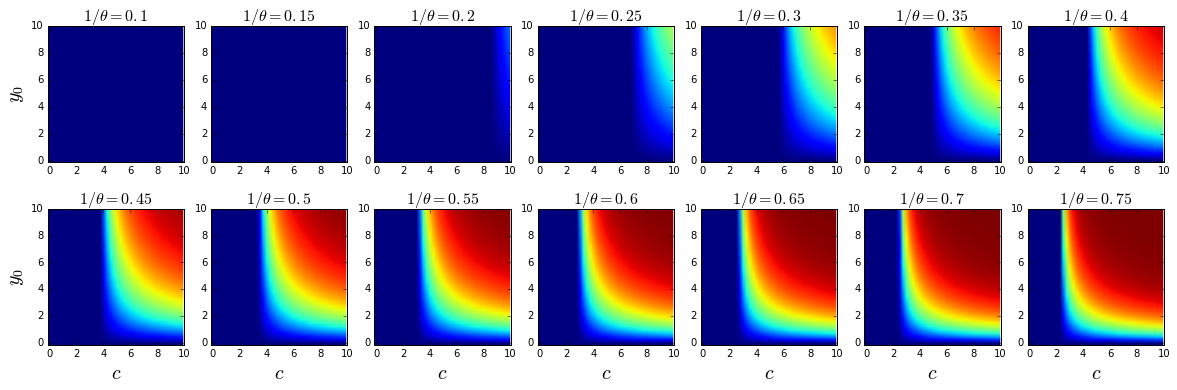

In [8]:
print("ГРАФИК ПОЛЕЗНОСТИ ПО ПЕРВЫМ ДВУМ КООРДИНАТАМ")
plt.figure(figsize=(20, 6))
for i in range(14):
    plt.subplot(2, 7, i + 1)
    plt.imshow(utility_values[:, :, i], origin='lower', vmax=1)
    if i > 6: plt.xlabel('$c$', fontsize=20)
    if i % 7 == 0: plt.ylabel('$y_0$', fontsize=20)
    plt.title('$1/\\theta = {}$'.format(round(price_multiplier[i], 2)), 
              fontsize=16)
    plt.xticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
    plt.yticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
plt.show()

ГРАФИК ПОЛЕЗНОСТИ ПО ДВУМ ПОСЛЕДНИМ КООРДИНАТАМ


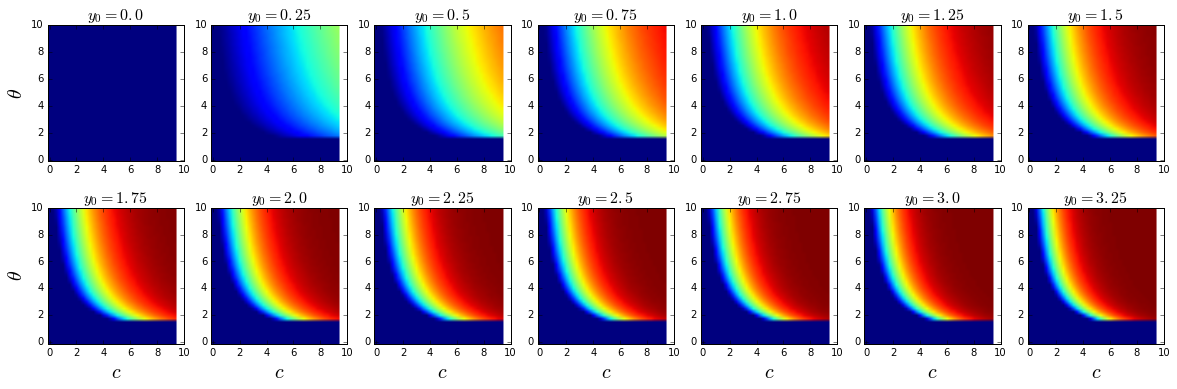

In [9]:
#  Start_capital - значния y_0, значит, теперь необходимо 
#  построить 14 графиков для каждого значения y_0 
print("ГРАФИК ПОЛЕЗНОСТИ ПО ДВУМ ПОСЛЕДНИМ КООРДИНАТАМ")
plt.figure(figsize=(20, 6))
for i in range(14):
    plt.subplot(2, 7, i + 1)
    plt.imshow(utility_values[i, :, :], origin='lower', vmax=1)
    if i > 6: plt.xlabel('$c$', fontsize=20)
    if i % 7 == 0: plt.ylabel('$\\theta$', fontsize=20)
    plt.title('$y_0 = {}$'.format(round(start_capital[i], 2)), 
              fontsize=16)
    plt.xticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
    plt.yticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
plt.show()

ГРАФИК ПОЛЕЗНОСТИ ПО ПОСЛЕДНИМ ДВУМ КООРДИНАТАМ


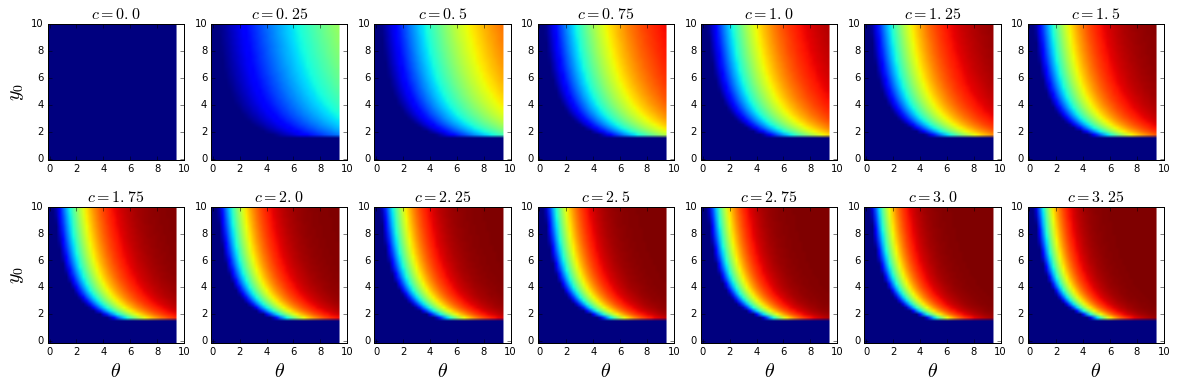

In [10]:
#  Параметр с - скорость поступления страховых взносов 
#  находится у нас в переменной contributions_rate
#  Тогда для каждого значеия с строим графики

print("ГРАФИК ПОЛЕЗНОСТИ ПО ПОСЛЕДНИМ ДВУМ КООРДИНАТАМ")
plt.figure(figsize=(20, 6))
for i in range(14):
    plt.subplot(2, 7, i + 1)
    plt.imshow(utility_values[i, :, :], origin='lower', vmax=1)
    if i > 6: plt.xlabel('$\\theta$', fontsize=20)
    if i % 7 == 0: plt.ylabel('$y_0$', fontsize=20)
    plt.title('$c = {}$'.format(round(contributions_rate[i], 2)), 
              fontsize=16)
    plt.xticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
    plt.yticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
plt.show()

Постройте точно такие же графики, фиксируя две другие координаты. Верно ли вы предположили поведение данной функции?

<font color='red'>__Вроде все логично. Красноты больше с увеличением скорости вкладов, с увеличением начального капитала. Потому что мы смотрим функцию полезности и увеличиваем главные парметры, засчет которых растет эта функция.__</font> 

Давайте теперь найдем параметры, которые дают максимум нашей функции полезности. Функция argmax в numpy выдаст нам индекс максимума, растянув перед этим нашу трехмерную матрицу в вектор. Поэтому для нахождения индексов пользуйтей следующей функцией.

In [11]:
def cool_argmax(array):
    indexes = np.unravel_index(np.argmax(array), array.shape)
    return indexes

Найдите параметры, дающие максимум функции полезности.

In [12]:
indexes = cool_argmax(utility_values)
print(indexes)

print('y_0 = %.2f, c = %.2f, \\theta = %.2f, u(y_0, c, \\theta) = %.2f' \
      % (start_capital[indexes[0]], contributions_rate[indexes[1]],
         price_multiplier[indexes[2]], utility_values[indexes]))

(39, 39, 37)
y_0 = 9.75, c = 9.75, \theta = 1.95, u(y_0, c, \theta) = 1.00


Получили, что максимум функции полезности достигается при максимальных параметрах.
Было бы странно, если бы получилось что-то иное.
Однако такое нас не устраивает.
Ведь если мы будем требовать много денег с клиентов и будем мало им платить, то у нас клиентов не будет вообще.

Введем некоторые ограничения на параметры.
Естественно, можно ввести ограничения сверху на каждый из параметров.
Однако давайте не будем жадными и введем некоторые линейные ограничения вида
$$\alpha_1 y_0 + \alpha_2 c + \alpha_3 \theta \leqslant \alpha_4$$

**Вопрос:** Какие положительные числа $\alpha_i$ можно выбрать в данной задаче?
Хочется увидеть творческий подход.

<font color='red'>__Ну ниже введены экономические термины. 
    Отношение альф нам важно. Так что судя из соотноения благ возьмем так, чтобы нам было больше прибыли. Никакого творчества :(__</font> 

Ниже приведен пример выставления линейных ограничений.

In [13]:
good_set = start_capital.reshape((-1, 1, 1)) \
            + contributions_rate.reshape((1, -1, 1)) \
            + 4 * price_multiplier.reshape((1, 1, -1)) <= 10
utility_values_good = utility_values * good_set

Нарисуйте графики функции полезности с ограничениями аналогично тому, как мы это делали выше.
Найдите параметры, при которых достигается максимум функции полезности при условии заданных ограничений, и само значение функции полезности.

Чем хороши такие линейные ограничения?

Введем понятие предельной нормы замещения
$$MRS_{ij} (x) = \frac{dx_i}{dx_j},$$
которое имеет смысл количества блага $j$, которое потребитель готов взять в обмен на единицу блага $i$, чтобы остаться на той же самой кривой безразличия.
Пусть $x^* = (y_0^*, c^*, \theta^*)$ --- точка условного максимума функции полезности при линейных ограничениях.
Тогда $$\left|MRS_{ij} (x)\right| = \frac{\alpha_i}{\alpha_j}$$

ГРАФИК ПОЛЕЗНОСТИ ПО ПЕРВЫМ ДВУМ КООРДИНАТАМ


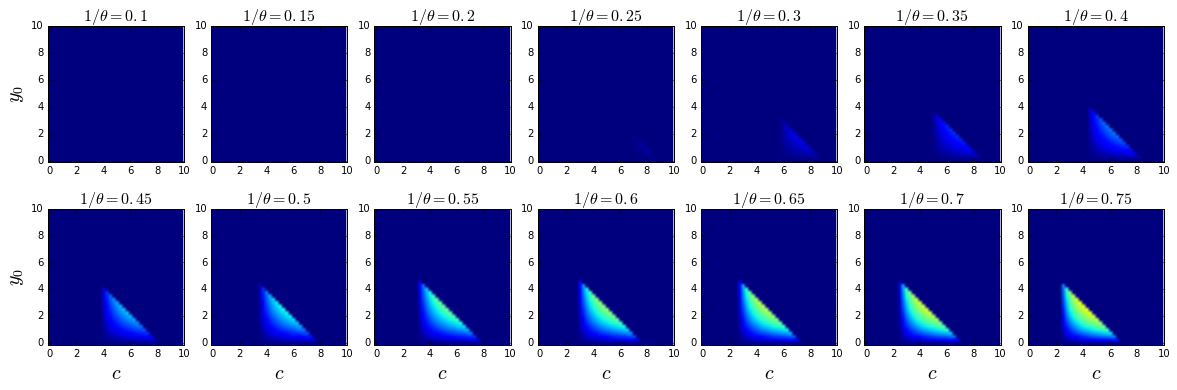

ГРАФИК ПОЛЕЗНОСТИ ПО ДВУМ ПОСЛЕДНИМ КООРДИНАТАМ


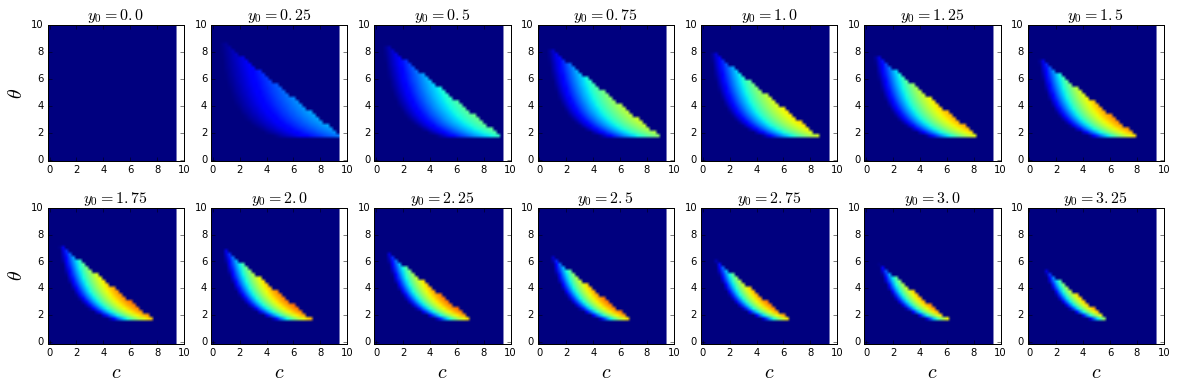

ГРАФИК ПОЛЕЗНОСТИ ПО ПОСЛЕДНИМ ДВУМ КООРДИНАТАМ


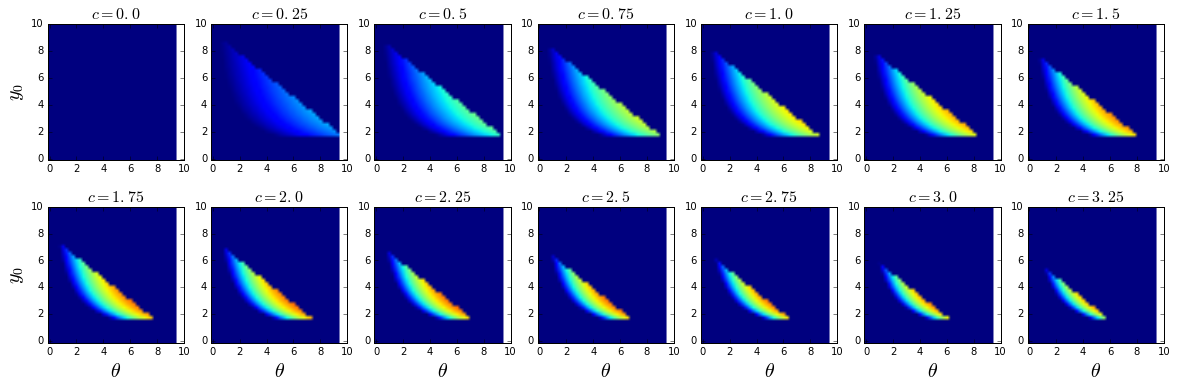

In [14]:
#  Вроде как все то же, только не utility_values теперь,
#  а utility_values_good

print("ГРАФИК ПОЛЕЗНОСТИ ПО ПЕРВЫМ ДВУМ КООРДИНАТАМ")
plt.figure(figsize=(20, 6))
for i in range(14):
    plt.subplot(2, 7, i + 1)
    plt.imshow(utility_values_good[:, :, i], origin='lower', vmax=1)
    if i > 6: plt.xlabel('$c$', fontsize=20)
    if i % 7 == 0: plt.ylabel('$y_0$', fontsize=20)
    plt.title('$1/\\theta = {}$'.format(round(price_multiplier[i], 2)), 
              fontsize=16)
    plt.xticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
    plt.yticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
plt.show()

print("ГРАФИК ПОЛЕЗНОСТИ ПО ДВУМ ПОСЛЕДНИМ КООРДИНАТАМ")
plt.figure(figsize=(20, 6))
for i in range(14):
    plt.subplot(2, 7, i + 1)
    plt.imshow(utility_values_good[i, :, :], origin='lower', vmax=1)
    if i > 6: plt.xlabel('$c$', fontsize=20)
    if i % 7 == 0: plt.ylabel('$\\theta$', fontsize=20)
    plt.title('$y_0 = {}$'.format(round(start_capital[i], 2)), 
              fontsize=16)
    plt.xticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
    plt.yticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
plt.show()

print("ГРАФИК ПОЛЕЗНОСТИ ПО ПОСЛЕДНИМ ДВУМ КООРДИНАТАМ")
plt.figure(figsize=(20, 6))
for i in range(14):
    plt.subplot(2, 7, i + 1)
    plt.imshow(utility_values_good[i, :, :], origin='lower', vmax=1)
    if i > 6: plt.xlabel('$\\theta$', fontsize=20)
    if i % 7 == 0: plt.ylabel('$y_0$', fontsize=20)
    plt.title('$c = {}$'.format(round(contributions_rate[i], 2)), 
              fontsize=16)
    plt.xticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
    plt.yticks(np.arange(41)[::8], np.arange(0, 11, 0.25)[::8].astype(int))
plt.show()

### Вывод:
    Мы рассматривали модель, в которой y_0 и с входят с коэффициентами 1.
    А theta - 4. Из введенных определений получаем, что 1/4 есть отношение блага 
    скорость поступления страховых взносов к ценовому множителю страховых выплат.
    То есть иначе, пользователю, конечно больше хочеся увеличить страховые выплаты,    
    нежели отдавать самому больше. Что мы и видим на графиках (нет красного почти).

Теперь реализуйте функцию, которая будем моделировать процесс $Y_t$ в соответствии с шаблоном ниже.

In [123]:
def model_process(start_capital, contributions_rate, lambd, theta, 
                  payment_distr, max_time=100, step=0.1):
    ''' Моделирует процесс Y_t в модели Крамера-лундберга 
    для набора времен np.arange(0, max_time, step).
            start_capital --- начальный капитал
            contributions_rate --- скорость поступления страховых взносов
            lambd --- параметр интенсивности пуассновского процесса
            payment_distr --- распределение случайной величины \eta 
                                (соответствует распределениям scipy.stats)
    '''
    
    times = np.arange(0, max_time, step)
    
    #  Начнем заполнять capital
    capital = [start_capital + contributions_rate * x for x in times]
    
    
    distr = []
    
    #  Сгенерировали Пуассновский процесс
    for i in range(len(times)):
        #  генерируем случайные величины
        distr.append(np.random.poisson(lambd * 0.1, 1)) 
        
    #  Считаем префикс-суммы для массива из случайных величин пуассоновского 
    #  распределения
    #  Это и есть количесво выплат к моменту времени t
    N = [np.sum(distr[:i]) for i in range(len(times))]
    N[0] = 0
    #  Величина выплаты для каждого момента
    eta = payment_distr.rvs(size=N[-1])

    #  Функция value в payment_distr принимает целые значения, поэтому я поделю тут
    eta = [(x / theta) for x in eta]
    
    #  Посчитали Y_t для каждого момента времени из times
    capital = [capital[j] - np.sum(eta[:N[j]]) for j in range(len(times))]
    
    return times, capital

Ниже показан пример задания распределения случайных величин $\eta_i$, моделирования процесса и построения графика.

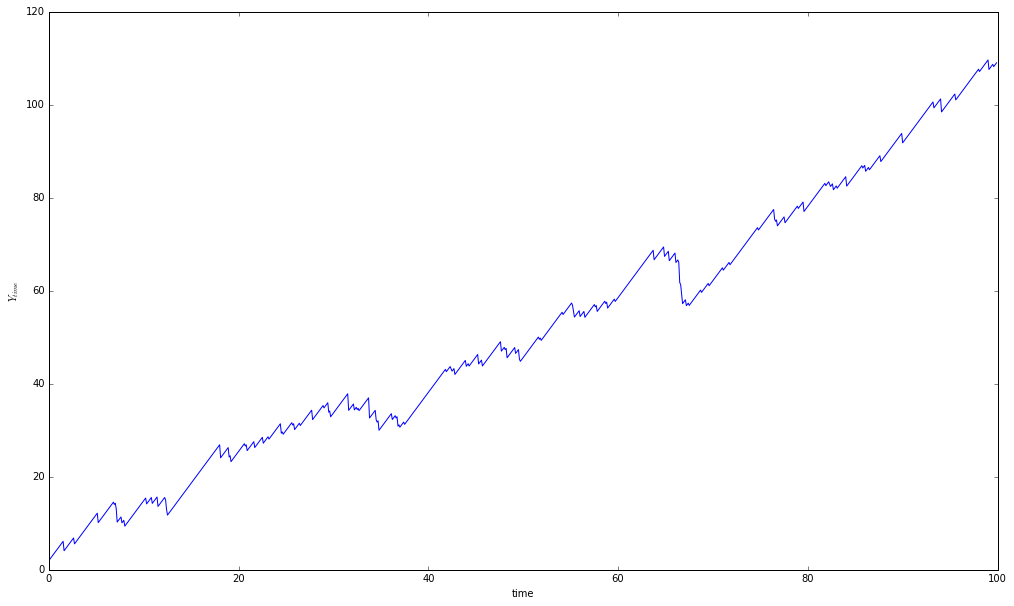

In [124]:
values = np.array([1, 2, 3])
probs = np.array([0.5, 0.3, 0.2])
payment_distr = sps.rv_discrete(name='payment_distr', 
                                values=(values, probs))
times, process = model_process(2, 2.75, 1, 1.3, payment_distr)



plt.figure(figsize=(17, 10))
plt.plot(times, process)
plt.xlabel("time")
plt.ylabel("$Y_{time}$")
plt.show()

### Вывод:    
    При произвольных параметрах видим, что есть как скачки, так и подъемы.    
    В итоге мы все равно растем и зарабатываем деньги, но есть опасные моменты времени.

Смоделируйте процесс и постройте его график для различных параметров:
- оптимальных, которые вы получили выше
- выставив большое значение одного параметра
- выставив малое значение одного параметра

Не забудьте сделать выводы.

За выполнение первой части можно получить **3 балла**.

###  МОДЕЛИРУЕМ ПРОЦЕСС С ПАРАМЕТРАМИ, ПОЛУЧЕННЫМИ ВЫШЕ
Мои параметры выше - это start_capital, contributions_rate, lambda, payment_distr
Оптимальные параметры, я считаю, это параметры, дающие максимум полезности
У нас они подписаны и их индексы находятся в переменной indexes
Построим сначала процесс с этими параметрами, потом будем варьировать

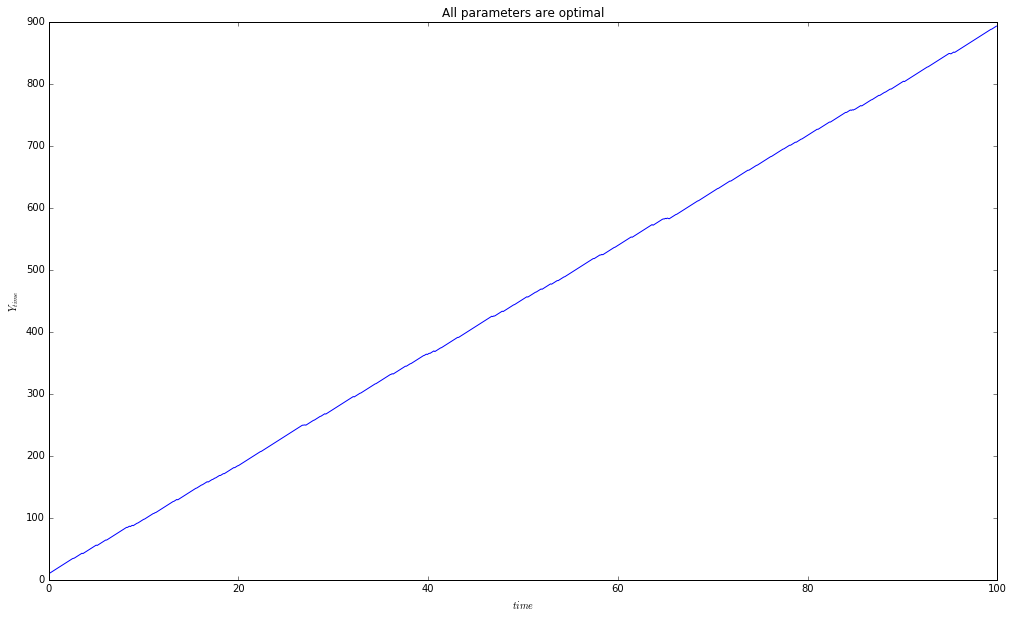

In [319]:
#  Оптимальные - максимальные парметры (посчитаны выше, индексы находятся 
#  в массиве indexes)

payment_distr = sps.rv_discrete(name='payment_distr', 
                                values=(values, probs))

times_1, process_1 = model_process(start_capital[indexes[0]], \
                                   contributions_rate[indexes[1]],\
                                   1, price_multiplier[indexes[2]], \
                                   payment_distr)

#  Рисуем 
plt.figure(figsize=(17, 10))
plt.plot(times_1, process_1)
plt.xlabel("$time$")
plt.ylabel("$Y_{time}$")
plt.title("All parameters are optimal")
plt.show()

### Вывод:
    Так как параметры оптимальные, ожидаем хорошую функцию и большой рост денег.       
    Здесь почти так. Почти никаких зазубрин (скачков, потерь денег) нет.    
    В сравнении с предыдущим, мы при t=100 уже имеем около 1000.

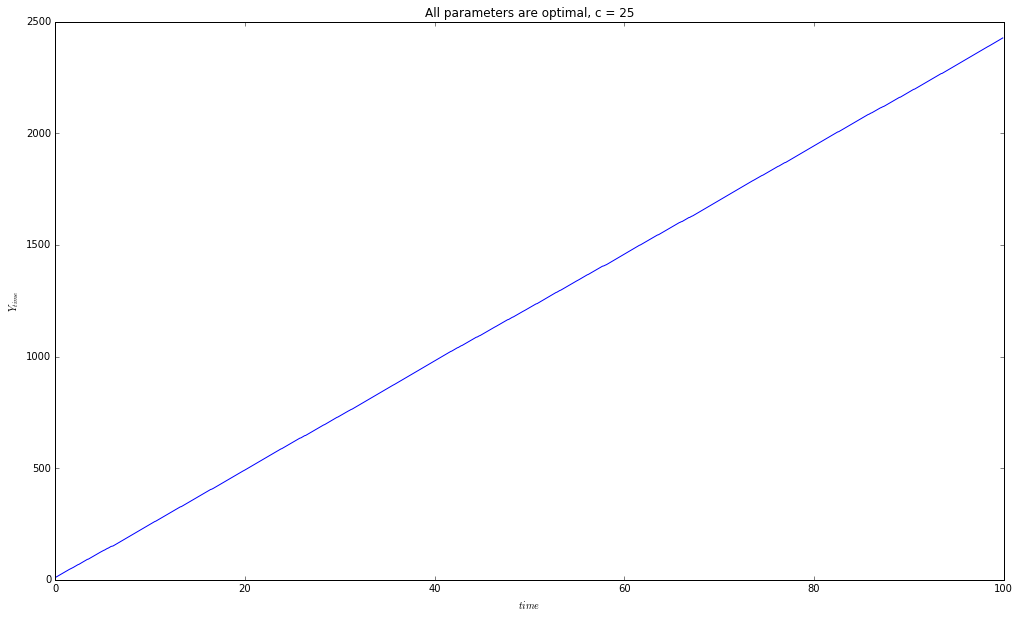

In [144]:
#  Здесь сделаем contributions_rate большим
#  То есть все параметры максимальные, а скорость ещё больше (=25)

times_2, process_2 = model_process(start_capital[indexes[0]], \
                                   25, 1,  \
                                   price_multiplier[indexes[2]], payment_distr)

#  Рисуем 
plt.figure(figsize=(17, 10))
plt.plot(times_2, process_2)
plt.xlabel("$time$")
plt.ylabel("$Y_{time}$")
plt.title("All parameters are optimal, c = 25")
plt.show()

### Вывод:
    Мы увеличили скорость поступления страховых взносов.    
    Значит, получать денег мы будем больше, ожидаем, что функция ровнее и растет быстрее.    
    Как видим, это действительно так.

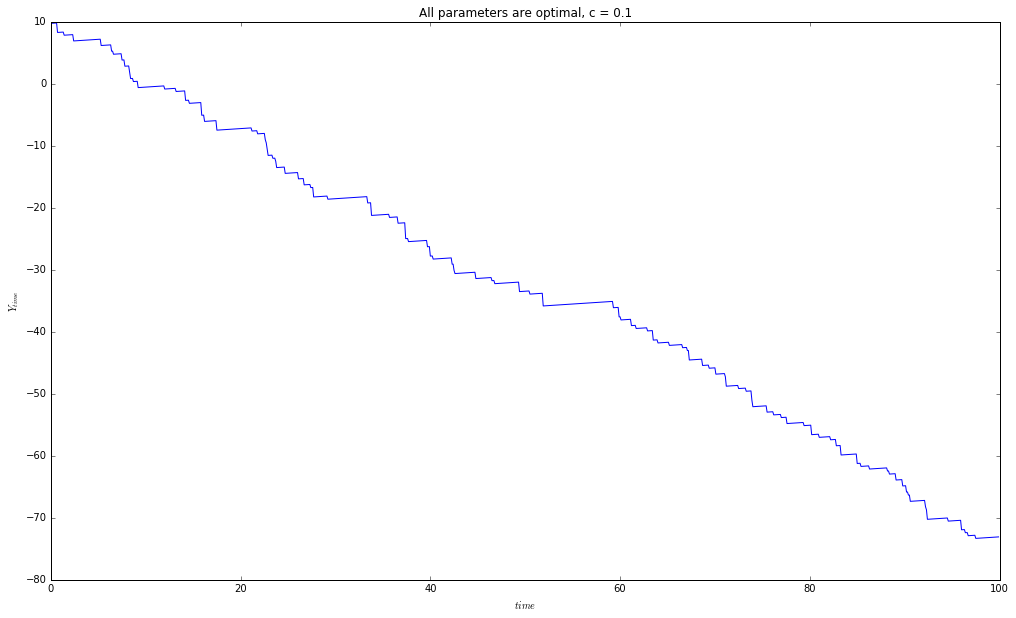

In [217]:
#  Здесь сделаем contributions_rate маленьким (= 0.1)

times_3, process_3 = model_process(start_capital[indexes[0]], 0.1, 1, \
                                   price_multiplier[indexes[2]], payment_distr)

#  Рисуем 
plt.figure(figsize=(17, 10))
plt.plot(times_3, process_3)
plt.title("All parameters are optimal, c = 0.1")
plt.xlabel("$time$")
plt.ylabel("$Y_{time}$")
plt.show()

### Вывод:
    Скорость получения взносов очень маленькая, деньги почти не приходят.
    Ожидаем, что разоримся. Как видим из графика, мы стремимся к разорению достаточно быстро.

### Часть 2

Пусть в некоторый момент времени капитал достиг уровня $y_1$.
Обозначим его $\tau = \inf \{ t\ \left|\ Y_t \geqslant y_1\right.\}$.
С практической точки зрения страховой компании может быть интересен вопрос об оценке сверху на математическое ожидание этого момента времени, чтобы понять, сколько нужно ждать до того момента, когда компания сможет заработать много денег.

На семинарах 494 группы мы показали, что он является моментом остановки относительно естественной фильтрации процесса $Y_t$.
Также на семинаре были выведены следующие оценки сверху на его математическое ожидание

1) Оценка имени Степана Каргальцева
$$\mathsf{E} \tau \leqslant \frac{v_1 (y_1 - y_0)}{-g(v_1)},$$
где $v_1 = \mathop{\rm arg\,max}\limits_v g(v)$ --- единственная точка минимума функции $g(v)$ на положительной полуоси.

2)
$$\mathsf{E} \tau \leqslant \min_{v:\ g(v) < 0} \frac{e^{v (y_1 - y_0)}}{-g(v)}$$

------

#### 1. (2 балла)
Теперь вам предстоит проверить, насколько точны эти оценки.
Для этого для разных параметров сгенерируйте достаточно большое количество траекторий, найдя для каждой из них значение $\tau$. Это позволит получить выборку и сделать оценку на $\mathsf{E} \tau$.

В каких случаях какие приведенные выше верхние оценки дают более точный результат? Насколько точный?



In [313]:
#  Возьмем y_1 = 333
#  Будем использовать 2 вида параметров: оптимальные, 
#  и вторые с contributions_rate = 5
y_1 = 100
#   Сгенерируем по 30 Y_t, посчитаем \tao
def return_samples(contributions_rate):
    process_set = []
    for i in range(0, 60):
        process_set.append(model_process(start_capital[indexes[0]], \
                                         contributions_rate,\
                                   1, price_multiplier[indexes[2]], payment_distr)[1])
    return process_set


process_set_1 = return_samples(contributions_rate[indexes[1]])
process_set_2 = return_samples(5)

In [314]:
#  Посчитаем для каждого значение tao
def tao(process_set):
    tao = []
    for i in range(0, 20):
        j = 0
        while (j < len(times) - 1 and process_set[i][j] < y_1):
            j = j + 1
        if (j > len(times)):
            tao.append(0)
        tao.append(round(times[j], 1))
    return tao

tao_1 = tao(process_set_1)
tao_2 = tao(process_set_2)

In [315]:
#  Посчитаем примерное математическое ожидание каждого тао
#  Я возьму за математическое ожидание выборочное среднее

E_1 = np.mean(tao_1)
E_2 = np.mean(tao_2)

print(E_1, E_2)

10.22 21.665


In [316]:
#  Теперь сделаем оценку формулами с семинара
#  Оценка имени Степана Каргальцева

#  Создали функцию и возвращаем v_1 и функцию
def return_v_1(contributions_rate):   
    g_1 = get_function_g(contributions_rate, price_multiplier[indexes[2]])

    #  Найдем единственную точку минимума на положительной полуоси
    #  Возьмем за положительную ось times (от 1)
    g_1_min = 2e+66
    v_1 = 0
    for i in times:
        if (g_1(i) < g_1_min):
            g_1_min = g_1(i)
            v_1 = i
    return v_1, g_1

#  Оценка для contributions_rate - оптимальное
v_1 = return_v_1(contributions_rate[indexes[1]])[0]
g_1 = return_v_1(contributions_rate[indexes[1]])[1]
estimate_stepan_1 = v_1 * (y_1 - start_capital[indexes[0]]) / (-g_1(v_1))
print(estimate_stepan_1)

14.5167542753


In [317]:
#  Оценка для contributions_rate = 5
v_1 = return_v_1(5)[0]
g_1 = return_v_1(5)[1]
estimate_stepan_2 = v_1 * (y_1 - start_capital[indexes[0]]) / (-g_1(v_1))
print(estimate_stepan_2)

33.7300689454


### Вывод:
    Оценка действительно сверху. Для первого случая она сработала даже очень хорошо. 
    Думаю, что точность оценки зависит от выбора y_1 достаточно сильно (попробовала).
    Ещё важны, как видим contribution_rate

#### 2. (2 балла)
Допустим, мы достигли момента времени $\tau$. Теперь наша компания богата, и нам не так страшно разориться. Может быть, стоит снизить цену страховых взносов (параметр $c$)? Или же увеличить цену страховых выплат (уменьшить параметр $\theta$).
Выясните это, посчитав значения нашей функции полезности при фиксированном $y_1$.
Проведите моделирование процессов, изменяя параметры при достижении момента времени $\tau$, и постройте графики процессов.

### Не сделала. Честно, хотела. 